In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime
plot_out_dir = "Images/"

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, cast, Numeric

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [ ]:
# Measurement = engine.execute("select * from measurement")
# print(f"Measurement Col.:{Measurement.keys()}")
# Station = engine.execute("select * from station")
# print(f"Station Col.: {Station.keys()}")
# inspector = inspect(engine)
# col = inspector.get_columns('Measurement')
# for c in col:
#     print(c["name"], c["type"])

In [7]:
# Save references to each table
Station, Measurement = Base.classes.station, Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)
# q1 = session.query(Station).first()
# print(q1.__dict__)
# q2 = session.query(Measurement).first()
# print(q2.__dict__)

In [10]:
# pdcon = engine.connect()
# Mea_pd = pd.read_sql("select * from measurement",pdcon)
# Mea_pd.head()
# Sta_pd = pd.read_sql("select * from station",pdcon)
# Sta_pd.head()

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [9]:
# finding out max date from the database...
#
mdt = session.query(func.max(Measurement.date)).one()
print(mdt)
maxdt = mdt[0]
# dt1 = session.query(func.max(Measurement.date)).scalar()
print(maxdt)
# finding out from date and to date for the last year
todt = datetime.datetime.strptime(maxdt, "%Y-%m-%d")
frdt = todt - datetime.timedelta(days=365)
print(frdt, todt)

('2017-08-23',)
2017-08-23
2016-08-23 00:00:00 2017-08-23 00:00:00


In [13]:
# # this brings only 1397 rows ... need to convert to date format...
# to_date = '{todt.year}-{todt.month}-{todt.day}'.format(todt = datetime.datetime.strptime(maxdt, "%Y-%m-%d"))
# fr_date = '{frdt.year}-{frdt.month}-{frdt.day}'.format(frdt = todt - datetime.timedelta(days=366))
# print(fr_date, to_date)
# result = session.query(Measurement.date,Measurement.prcp).\
#     filter(Measurement.date >= fr_date, Measurement.date <= to_date).all()
# cnt = 0
# for row in result:
# #     print(row)
#     cnt = cnt +1
# print(cnt)

In [14]:
# query brings 2230 rows...
# results = session.query(Measurement.date,Measurement.prcp).\
#     filter(func.DATE(Measurement.date) >= func.DATE(frdt), func.DATE(Measurement.date) <= func.DATE(todt)).all()
#
# print(len(results))

In [10]:
# creating a dataframe for the past 12 months data...  Total 2230 rows...
stmt = session.query(Measurement.date,Measurement.prcp).\
    filter(func.DATE(Measurement.date) >= func.DATE(frdt), \
           func.DATE(Measurement.date) <= func.DATE(todt)).statement
df = pd.read_sql_query(stmt, session.bind)
# df.head()

In [11]:
# cleansing the data and sorting by date...  Total 2021 rows....
df2 = df.dropna(how='any').set_index(['date'])
sorted_df = df2.sort_values(['date'])
sorted_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15


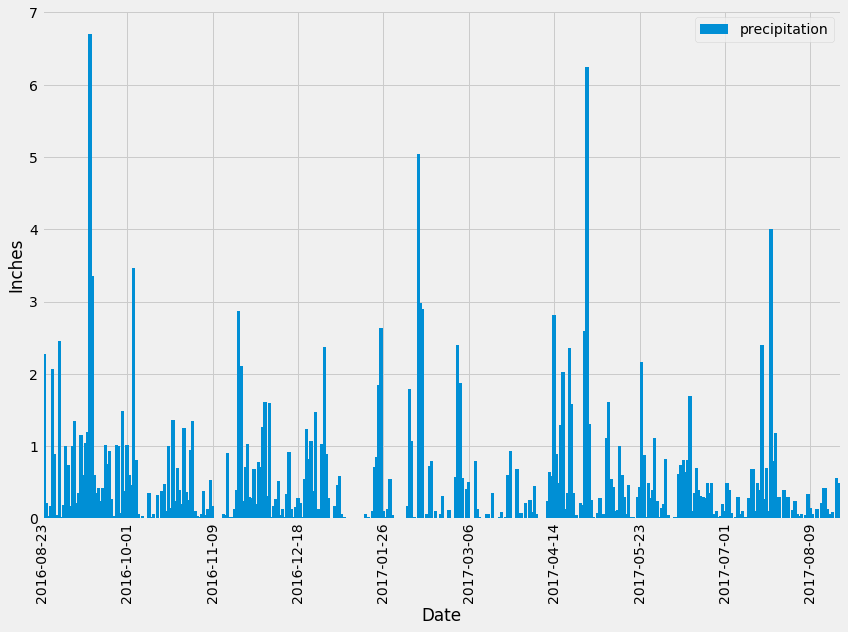

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
import matplotlib.ticker as plticker
pfile = 'prcp.png'
fig, ax = plt.subplots(figsize=(12,9))
sorted_df.columns = ['precipitation']
ax.bar(sorted_df.index.values, sorted_df.precipitation, width=1.5, align='center')
plt.xlim(sorted_df.index.min(), sorted_df.index.max())
plt.legend(sorted_df.columns, loc='best')
loc = plticker.MultipleLocator(base=39.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Inches')
# plt.legend('precipitation', loc='best')
# locator = mdates.AutoDateLocator()
# # locator.intervald[]
# formatter = mdates.DateFormatter('%Y-%m-%d')
# ax.xaxis.set_major_locator(locator)
# ax.xaxis.set_major_formatter(formatter)
# xaxis.get_xmajorticklabels()
plt.tight_layout()
plt.savefig(plot_out_dir + pfile)
plt.show()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.station).distinct().count()

9

In [15]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# sel = [Station.name, 
#        func.count(Measurement.station)]
active_stations = session.query(Station.station,func.count(Measurement.station)).\
    filter(Station.station == Measurement.station).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
for row in active_stations:
    print(f"The station {row[0]} has {row[1]} rows")

print("\n"+f"Most active station is {active_stations[0][0]} and has {active_stations[0][1]} rows.")

The station USC00519281 has 2772 rows
The station USC00519397 has 2724 rows
The station USC00513117 has 2709 rows
The station USC00519523 has 2669 rows
The station USC00516128 has 2612 rows
The station USC00514830 has 2202 rows
The station USC00511918 has 1979 rows
The station USC00517948 has 1372 rows
The station USC00518838 has 511 rows

Most active station is USC00519281 and has 2772 rows.


In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
asel = [Measurement.station,
        func.min(Measurement.tobs),
        func.max(Measurement.tobs),
        func.avg(Measurement.tobs),
        func.max(Measurement.date)
      ]
actstation_temp = session.query(*asel).filter(Station.station == Measurement.station).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()

print(f"The most active station {actstation_temp[0]} has Lowest Temp.:{actstation_temp[1]},\
 Highest Temp.:{actstation_temp[2]}, and Average Temp.:{round(actstation_temp[3],1)}")

The most active station USC00519281 has Lowest Temp.:54.0, Highest Temp.:85.0, and Average Temp.:71.7


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [17]:
# get the max date for the most active station from previous query
print(f"Max date for the most active station is :{actstation_temp[4]}")
#
sfrdt = datetime.datetime.strptime(actstation_temp[4], "%Y-%m-%d") - datetime.timedelta(days=365)
# print(sfrdt)

Max date for the most active station is :2017-08-18


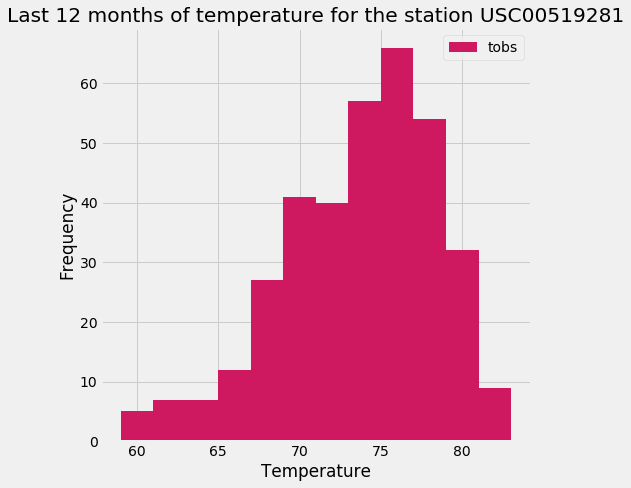

In [18]:
# Query the last 12 months of temperature observation data for the most active station
results2 = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station == actstation_temp[0]).\
    filter(func.DATE(Measurement.date) >= func.DATE(sfrdt), \
    func.DATE(Measurement.date) <= func.DATE(actstation_temp[4])).all()
df = pd.DataFrame(results2)
del df['date']
pfile = 'histo.png'
#
#  to plot histogram
#
fig=plt.figure(figsize=(8, 7))
plt.hist(df.tobs,  bins=12, color='#ce185f')
plt.legend(df.columns, loc='best')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title(f"Last 12 months of temperature for the station {actstation_temp[0]}")
plt.tight_layout()
plt.savefig(plot_out_dir + pfile)
plt.show()

## Bonus Challenge Assignment

In [19]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [20]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_fdt = '2016-08-22'
trip_tdt = '2017-08-22'
trip_avg = calc_temps(trip_fdt,trip_tdt)
print(trip_avg)

[(58.0, 74.58889386475593, 87.0)]


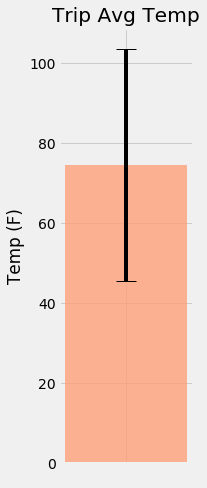

In [21]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
pfile = 'avg_temp.png'
#align='center', alpha=0.5, ecolor='#FF5733',
# fig, ax = plt.subplots()
# ax.bar(" ", ypos, yerr=err, capsize=10)
# ax.set_ylim(0, ypos+err+10)
# ax.set_ylabel("Temp (F)")
# # ax.set_xticks(xpos)
# ax.set_title("Trip Avg Temp")
# ax.yaxis.grid(True)
#
fig = plt.figure(figsize=(3,7))
ypos = trip_avg[0][1]
err = trip_avg[0][2]-trip_avg[0][0]
# print(ypos, err)
wid = 0.2
plt.bar(" ", ypos, yerr=err, capsize=10, alpha=0.8, width=wid,  color='#FFA07A')
plt.ylabel("Temp (F)")
plt.title("Trip Avg Temp")
plt.grid(True)
plt.tight_layout()
plt.savefig(plot_out_dir + pfile)
plt.show()

In [22]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
# tfdt = datetime.datetime.strptime(trip_fdt, "%Y-%m-%d")
# ttdt = datetime.datetime.strptime(trip_tdt, "%Y-%m-%d")
rain = [Measurement.station,
        Station.name,
        Station.latitude,
        Station.longitude,
        Station.elevation,
        func.sum(Measurement.prcp)
       ]
rain_results = session.query(*rain).filter(Measurement.station == Station.station).\
            filter(func.DATE(Measurement.date) >= func.DATE(trip_fdt), func.DATE(Measurement.date) <= func.DATE(trip_tdt)).\
            group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()
for row in rain_results:
    print(f"Station:{row.station} Name:{row.name} Lat.:{row.latitude} Lng.:{row.longitude} Elev.:{row.elevation} Total Rainfall:{round(row[5],2)}")


Station:USC00516128 Name:MANOA LYON ARBO 785.2, HI US Lat.:21.3331 Lng.:-157.8025 Elev.:152.4 Total Rainfall:148.56
Station:USC00519281 Name:WAIHEE 837.5, HI US Lat.:21.45167 Lng.:-157.84888999999998 Elev.:32.9 Total Rainfall:72.35
Station:USC00513117 Name:KANEOHE 838.1, HI US Lat.:21.4234 Lng.:-157.8015 Elev.:14.6 Total Rainfall:49.45
Station:USC00519523 Name:WAIMANALO EXPERIMENTAL FARM, HI US Lat.:21.33556 Lng.:-157.71139 Elev.:19.5 Total Rainfall:38.33
Station:USC00514830 Name:KUALOA RANCH HEADQUARTERS 886.9, HI US Lat.:21.5213 Lng.:-157.8374 Elev.:7.0 Total Rainfall:33.24
Station:USC00519397 Name:WAIKIKI 717.2, HI US Lat.:21.2716 Lng.:-157.8168 Elev.:3.0 Total Rainfall:16.49
Station:USC00517948 Name:PEARL CITY, HI US Lat.:21.3934 Lng.:-157.9751 Elev.:11.9 Total Rainfall:4.59


In [23]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [24]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
nsdt = '2018-01-01'
nedt = '2018-01-07'
nod = datetime.datetime.strptime(nedt, "%Y-%m-%d")-datetime.datetime.strptime(nsdt, "%Y-%m-%d")
# print(nod.days)

# Use the start and end date to create a range of dates
# 
dtlist = []
for i in range(0, nod.days+1):
    ddt = datetime.datetime.strptime(nsdt, "%Y-%m-%d") + datetime.timedelta(days = i)
    dtlist.append(ddt.strftime('%Y-%m-%d'))
# print(dtlist)

# # Stip off the year and save a list of %m-%d strings
mmdd = []
for i in range(0, nod.days+1):
    yy,mm,dd = dtlist[i].split('-')
    mmdd.append(f"{mm}-{dd}")

# print(mmdd)
# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for i in range(0, nod.days+1):
    res = daily_normals(mmdd[i])
    normals.append((dtlist[i],res[0][0],res[0][1],res[0][2]))

# normals

In [25]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

df = pd.DataFrame(normals, columns=['date','tmin','tavg','tmax'])
# df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df = df.set_index(['date'])
df.head()

,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


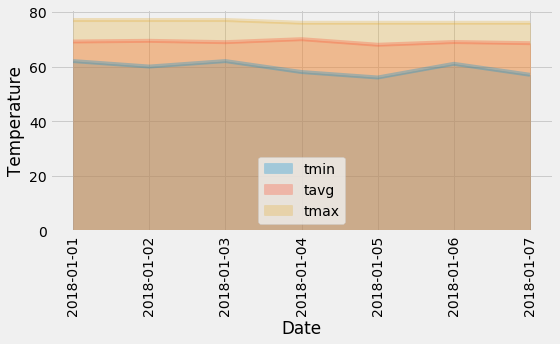

In [26]:
# Plot the daily normals as an area plot with `stacked=False`
# fig = plt.figure()
pfile = "normals.png"
#
df.plot(kind='area', stacked=False, alpha=0.3, rot=90, figsize=(8,5))
plt.xlabel('Date')
plt.legend(loc='lower center')
plt.ylabel('Temperature')
plt.grid(True)
plt.tight_layout()
plt.savefig(plot_out_dir + pfile)
plt.show()

In [27]:
# Temperature Analysis I
#
# Is there a meaningful difference between the temperature in, for example, June and December?
#
jmonth = '06'
dmonth = '12'
june_avgtemp = session.query(func.avg(Measurement.tobs)).\
                    filter(func.strftime("%m", Measurement.date) == jmonth).first()
dec_avgtemp = session.query(func.avg(Measurement.tobs)).\
                    filter(func.strftime("%m", Measurement.date) == dmonth).first()
jtemp = session.query(Measurement.tobs).\
                    filter(func.strftime("%m", Measurement.date) == jmonth).\
                    order_by(Measurement.tobs).all()
dtemp = session.query(Measurement.tobs).\
                    filter(func.strftime("%m", Measurement.date) == dmonth).\
                    order_by(Measurement.tobs).all()
print(f"June Average Temperature : {round(june_avgtemp[0],2)} and December Average Temperature : {round(dec_avgtemp[0],2)}")
print(f"Jund Record Counts: {len(jtemp)} and December Record Counts: {len(dtemp)}")

June Average Temperature : 74.94 and December Average Temperature : 71.04
Jund Record Counts: 1700 and December Record Counts: 1517


In [28]:
# data cleaning for t-test analysis...
import random
june_data = list(np.ravel(jtemp))
dec_data = list(np.ravel(dtemp))
jun_sample = random.sample(june_data, 1000)
dec_sample = random.sample(dec_data, 1000)
jdata = np.sort(np.asarray(jun_sample))
ddata = np.sort(np.asarray(dec_sample))

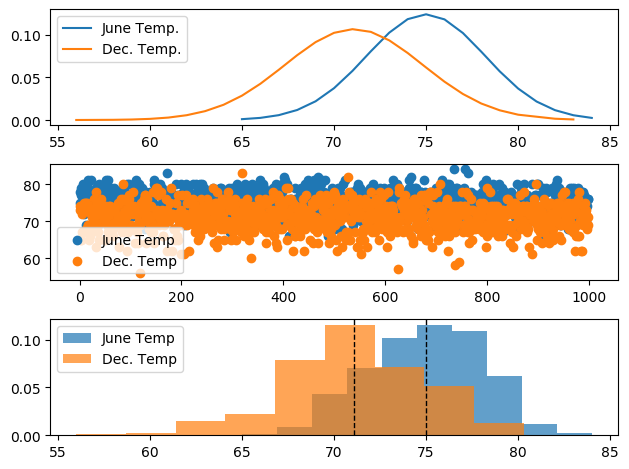

In [29]:
# Plot the Data
pfile = 'ttest.png'
style.use('default')
#
from scipy.stats import norm
label = ['June Temp.','Dec. Temp.']

# plot to see t-distribution using probability density function (pdf)
plt.subplot(3, 1, 1)
plt.plot(jdata, norm.pdf(jdata, jdata.mean(), jdata.std()))
plt.plot(ddata, norm.pdf(ddata, ddata.mean(), ddata.std()))
plt.legend(['June Temp.','Dec. Temp.'])

# Scatter Plot of Data
plt.subplot(3, 1, 2)
plt.scatter(range(len(jun_sample)), jun_sample, label='June Temp')
plt.scatter(range(len(dec_sample)), dec_sample, label='Dec. Temp')
plt.legend()

#Histogram plot of Data
plt.subplot(3, 1, 3)
plt.hist(jdata, 10, density=True, alpha=0.7, label='June Temp')
plt.hist(ddata, 10, density=True, alpha=0.7, label='Dec. Temp')
plt.axvline(jdata.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(ddata.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()
plt.tight_layout()
plt.savefig(plot_out_dir + pfile)
plt.show()

In [30]:
import scipy.stats as stats
stats.ttest_rel(jun_sample, dec_sample)

Ttest_relResult(statistic=25.105950702114637, pvalue=3.1250389570416175e-108)

#### Note-1: Based on the result of a hypothesis test, the data support the null hypothesis which means there is no significant difference in the means for the June and December temperatures.

#### Note-2: I used paired t-test because both samples come from the same data collection and we are comparing the means of it under two different times - where as with an unpaired t-test you'd compare the means of unrelated groups.